In [1]:
"""
<html>
  <body>
    <div id='div_1'>
      <p class='section' id ='intro'>
        This is a brief introduction to <b>HTML</b>.
      </p>
    </div>
  </body>
</html>
"""

"\n<html>\n  <body>\n    <div id='div_1'>\n      <p class='section' id ='intro'>\n        This is a brief introduction to <b>HTML</b>.\n      </p>\n    </div>\n  </body>\n</html>\n"

In [2]:
import pandas as pd

df = pd.DataFrame([[19, 55], [22, 64]],
index=["obj_1", "obj_2"],
columns=["length", "height"])
df

,length,height
obj_1,19,55
obj_2,22,64


In [3]:
print(df.to_json()) 

{"length":{"obj_1":19,"obj_2":22},"height":{"obj_1":55,"obj_2":64}}


In [4]:
# back to dataframe with read_json()
pd.read_json(df.to_json())

,length,height
obj_1,19,55
obj_2,22,64


In [5]:
import wikipediaapi

In [6]:
# instantiate object and call page method
wiki_en = wikipediaapi.Wikipedia('en')
page = wiki_en.page('University_of_Passau') 

In [7]:
print('title:\n', page.title)
print('\nsummary:\n',page.summary)

title:
 University_of_Passau



summary:
 The University of Passau (Universität Passau in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.


In [8]:
import requests as re

In [9]:
wiki_url = 'https://en.wikipedia.org/w/api.php'

# store parameters as dictionary to pass to function, may include key and username for authentication 
# the parameters are found in the documentary!
params = {'action': 'query',
         'format': 'json',
         'titles': 'University_of_Passau',
         'prop': 'extracts',
         'exintro': 1,
         'disablelimitreport':1}

response = re.get(wiki_url, params=params)
print(type(response))

<class 'requests.models.Response'>


In [10]:
# check, if request was successful
response.status_code    # -> 200 

200

In [11]:
import json

In [12]:
print(json.dumps(response.json(), indent=4))

{
    "batchcomplete": "",
    "warnings": {
        "main": {
            "*": "Unrecognized parameter: disablelimitreport."
        },
        "extracts": {
            "*": "HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats."
        }
    },
    "query": {
        "normalized": [
            {
                "from": "University_of_Passau",
                "to": "University of Passau"
            }
        ],
        "pages": {
            "409091": {
                "pageid": 409091,
                "ns": 0,
                "title": "University of Passau",
                "extract": "<p>The <b>University of Passau</b> (<i>Universit\u00e4t Passau</i> in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus

In [13]:
# we can now navigate through the nested dictionaries
title = response.json()['query']['pages']['409091']['title']
print('title: ',title)
summary = response.json()['query']['pages']['409091']['extract']
print('\nsummary:', summary)

title:  University of Passau

summary: <p>The <b>University of Passau</b> (<i>Universität Passau</i> in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
</p><p>Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.</p>


In [14]:
from bs4 import BeautifulSoup

# first instantiate object, use 'lxml' parser (installation necessary) 
my_soup = BeautifulSoup(summary, 'lxml')

# extract the text, i.e. remove tags
print(my_soup.text)

The University of Passau (Universität Passau in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.


In [15]:
# first, send request - get response from ordinary url
response = re.get('https://en.wikipedia.org/wiki/University_of_Passau')

# second, extract content from the response (html)
html = response.content

# third, instantiate BS onject
soup = BeautifulSoup(html)

# if necessary look at a formatted version of the html
# print(soup.prettify())     # -> very long output

In [16]:
# finally print the text attribute from the created object
print(soup.text[588:1037])     # only part of document for shorter output 


The University of Passau (Universität Passau in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.


In [17]:
soup.find('p').getText()

'The University of Passau (Universität Passau in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.\n'

In [18]:
api_key = 'my_key'
api_key = '44c50c7a71efa92e8dac68f5902ea0ec'

In [19]:
# define components of the request
base_url = 'https://financialmodelingprep.com/api/v3/'
filing = 'profile'
stock = 'GOOG'
params = {'apikey': api_key}

# send request and store reponse
response = re.get(base_url+filing+'/'+stock, params=params)

In [20]:
# Without further processing, the json is already quite well structured to read
response.json()

[{'symbol': 'GOOG',
  'price': 101.31,
  'beta': 1.099484,
  'volAvg': 23226134,
  'mktCap': 1315885154304,
  'lastDiv': 0.0,
  'range': '95.27-152.1',
  'changes': -0.08000183,
  'companyName': 'Alphabet Inc.',
  'currency': 'USD',
  'cik': '0001652044',
  'isin': 'US02079K1079',
  'cusip': '02079K107',
  'exchange': 'NASDAQ Global Select',
  'exchangeShortName': 'NASDAQ',
  'industry': 'Internet Content & Information',
  'website': 'https://www.abc.xyz',
  'description': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; a

In [21]:
filing = 'dowjones_constituent'
response = re.get(base_url+filing, params=params)
print(response.status_code)

200


In [22]:
dji_df = pd.DataFrame.from_dict(response.json())
print(dji_df.head(3))

  symbol                          name              sector  \
0    CRM            Salesforce.Com Inc          Technology   
1    WBA  Walgreens Boots Alliance Inc          Healthcare   
2      V                      Visa Inc  Financial Services   

            subSector                headQuarter dateFirstAdded         cik  \
0          Technology  San Francisco, CALIFORNIA     2020-08-31  0001108524   
1          Healthcare        Deerfield, ILLINOIS     2018-06-26  0001618921   
2  Financial Services  San Francisco, CALIFORNIA     2013-09-23  0001403161   

      founded  
0  2004-06-23  
1  2014-12-31  
2  2008-03-19  


In [23]:
# extract symbol column and convert to list
dji_symbols = dji_df.symbol.tolist()
print(dji_symbols)

['CRM', 'WBA', 'V', 'NKE', 'UNH', 'TRV', 'VZ', 'INTC', 'WMT', 'JNJ', 'DIS', 'MCD', 'JPM', 'CAT', 'BA', 'AMGN', 'DOW', 'AAPL', 'GS', 'CSCO', 'MSFT', 'HD', 'PG', 'MRK', 'IBM', 'HON', 'KO', 'CVX', 'AXP', 'MMM']


In [24]:
# set the filing (from documentation)
filing = 'historical-price-full'

# create empty dataframe (before loop!) to collect data for every company in loop
dji_hist = pd.DataFrame()

# loop over first 5 symbols in the list
for symbol in dji_symbols[:5]:
    
    # request data for every symbol 
    response = re.get(base_url+filing+'/'+symbol, params=params)
    # break the loop if a response error occurs
    if response.status_code != 200:
        print('Error! Aborted')
        break
    # convert the response to json to temporary dataframe
    temp_df = pd.DataFrame.from_dict(response.json()['historical'], orient='columns')
    # add column with respective symbol
    temp_df['symbol'] = symbol
    # append temporary dataframe to collect dataframe 
    dji_hist = pd.concat([dji_hist, temp_df], ignore_index=True)
    # delete temporary dataframe before next iteration
    del temp_df

AxesSubplot(0.125,0.11;0.775x0.77)


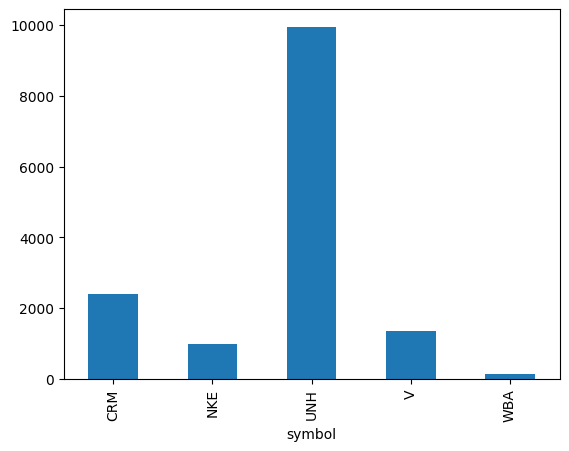

In [25]:
# just one example to show all companies' data made it to the collect dataframe: variance of opening price 
print(dji_hist.groupby('symbol').open.var().plot(kind='bar'))